# Machine Learning for Biomedical Data with Python
## Code 2.2 Polynomial Fitting
Realize Parameter Fitting and know how to select the best model

In [1]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from random import seed

### A. Generate random data setswith Gaussian Distribution

Generate a vector from 1 to 10 with steps of 0.1
x = np.arange(0,10,0.1)
x = np.linspace(0, 10, 10)

In [14]:
x = np.arange(0,4,.5)

Generating artificially y=f(x) with White Noise (0,0.1)

In [15]:
def f(x):
        return x**5 - 30*x**3  -10 # + stats.norm.rvs(loc=0,scale= .01,size=len(x))

Plotting raw data (x,y)

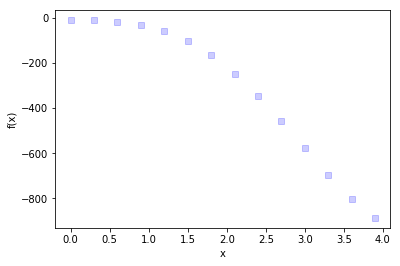

In [16]:
ax = plt.plot(x,f(x),'bs',alpha=0.2,)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.savefig('fdx.pdf', format='pdf', dpi=1200, bbox_inches="tight")
plt.show()

### Polynomial Fitting
#### Polynomial Module (numpy.polynomial.polynomial)

In [17]:
import numpy.polynomial.polynomial as poly

a) polyfit(x, y, deg[, rcond, full, w]) -- Least-squares fit of a polynomial to data.

In [18]:
coef = poly.polyfit(x, f(x), 8,rcond=None,w=None) # Assuming a Polynomyal degree 8

b) Creating a Polynomial Model

In [19]:
model = poly.Polynomial(coef)
model

Polynomial([-1.00000000e+01, -2.72722857e-13, -1.56048720e-12, -3.00000000e+01,
       -8.00177644e-12,  1.00000000e+00, -1.82968707e-12,  3.20634985e-13,
       -2.23647090e-14], domain=[-1,  1], window=[-1,  1])

c) Plotting Polynomials for training phase

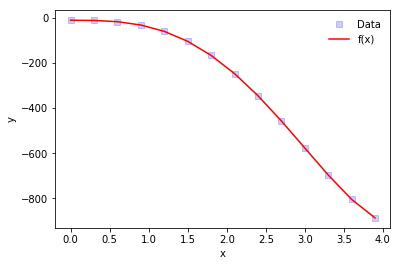

In [20]:
plt.plot(x, f(x),'bs',alpha=0.2, label='Data')
plt.plot(x, model(x),'r', label='f(x)')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

d) Plotting Polynomials for validation phase

In [21]:
x = np.arange(4,20,0.5)

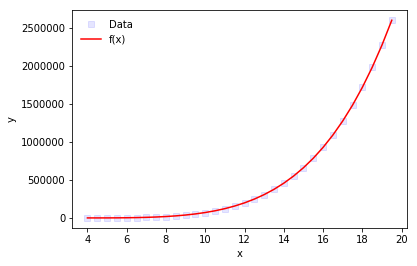

In [22]:
plt.plot(x, f(x),'bs',alpha=0.1, label='Data')
plt.plot(x, model(x),'r', label='f(x)')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Model Selection
We will explore different polynomials and check which provides the best fitting as well as the least AIC.

In [11]:
Pol_Max = 15 # Highest degree polynomial we are going to check.
# empty arrays
RSSv = [] 
RSSv = np.zeros(Pol_Max-1)
AICv = []
AICv = np.zeros(Pol_Max-1)

Cycle to check different polynomials

In [43]:
x = np.arange(1,10,0.5)
for i in np.arange(0,Pol_Max-1,1):
        coef = poly.polyfit(x, f(x), i+1)
        model = poly.Polynomial(coef)
        RSSv[i]=0.5*np.sum((f(x)-model(x))**2)
        AICv[i]=len(x)*math.log10(RSSv[i]/len(x))+ 2*len(coef)*len(x)/(len(x)-len(coef)-1)

Plotting RSS and AIC

No handles with labels found to put in legend.
No handles with labels found to put in legend.


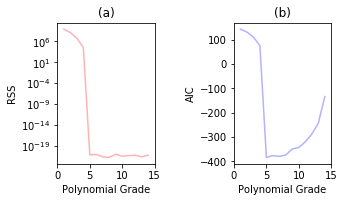

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(0,Pol_Max-1,1)+1, RSSv,'r',alpha=0.3)
ax1.set_yscale('log')
ax1.legend(loc='best', frameon=False)
ax1.set(xlabel='Polynomial Grade', ylabel='RSS')
ax1.set(xlim=(0, Pol_Max))
ax1.set_title('(a)')
# Second #figure
fig.tight_layout(pad=5.0)
ax2.plot(np.arange(0,Pol_Max-1,1)+1, AICv,'b',alpha=0.3)
ax2.set(xlabel='Polynomial Grade', ylabel='RSS')
ax2.legend(loc='best', frameon=False)
ax2.set(xlabel='Polynomial Grade', ylabel='AIC')
ax2.set(xlim=(0, Pol_Max))
ax2.set_title('(b)')
plt.show()

The most likely polynomial grade is of grade:

In [45]:
grade = np.argmin(AICv)+1
grade

5

In [46]:
poly.polyfit(x, f(x), grade)

array([-1.00000000e+01,  6.48345704e-12, -7.60547295e-13, -3.00000000e+01,
        7.12977355e-14,  1.00000000e+00])